This is a basic CAESAR sypher cryptography algorithm
--

Imports
--

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
import unicodedata
import operator
import math
from collections import Counter

Text samples and distribution of languages unigrams (Text come from wikipedia Eminem)
---

In [2]:
ENGLISH_SAMPLE = """After his debut album Infinite (1996), Eminem achieved mainstream popularity in 1999 with The 
Slim Shady LP, which earned him his first Grammy Award for Best Rap Album. His next two releases, 2000's The Marshall  
Mathers LP and 2002's The Eminem Show, were worldwide successes, with each being certified diamond in U.S. sales and 
both winning Best Rap Album Grammy Awards—making Eminem the first artist to win the award for three consecutive LPs. 
They were followed by Encore in 2004, another critical and commercial success. Eminem went on hiatus after touring in 
2005, releasing Relapse in 2009 and Recovery in 2010. Both won Grammy Awards and Recovery was the best-selling album 
of 2010 worldwide, the second time he had the international best-selling album of the year (after The Eminem Show). 
Eminem's eighth album, 2013's The Marshall Mathers LP 2, won two Grammy Awards, including Best Rap Album; 
it expanded his record for the most wins in that category and his Grammy total to 15. Eminem has developed other 
ventures, including Shady Records with manager Paul Rosenberg. He has his own channel, Shade 45, on Sirius XM Radio. 
In November 2002, Eminem starred in the hip hop film 8 Mile. He won the Academy Award for Best Original Song for 
'Lose Yourself', the first rap artist to win the award.[3] Eminem has made cameo appearances in the films The Wash 
(2001), Funny People (2009), The Interview (2014) and the television series Entourage (2010)."""

FRENCH_SAMPLE = """Encore inconnu du grand public, Eminem publie son premier album, intitulé Infinite, en 1996. 
Le disque est un échec critique et commercial. Il n'obtient une popularité mondiale qu'après la sortie de son 
deuxième album, The Slim Shady LP en 1999, le premier publié au label du producteur et rappeur Dr. Dre. Cet album 
lui vaut son premier Grammy Award, celui du « meilleur album rap »7. Il remporte le même trophée pour ses deux 
albums suivants, The Marshall Mathers LP et The Eminem Show, ce qui fait de lui le recordman du nombre de victoires 
consécutives pour ce prix. Le rappeur enchaîne en 2004 avec l'album Encore. Après une retraite forcée de trois ans, 
Eminem fait son retour en 2009 avec l'album Relapse, laissant derrière lui ses problèmes de drogue. 
L'année suivante, il sort son septième album studio, Recovery, qui est un succès planétaire. Il est l'album le plus 
vendu de l'année 2010, tout comme The Eminem Show en 2002. Fin 2013, il publie son huitième album studio 
The Marshall Mathers LP 2 qui lui permet de gagner deux Grammys Awards, un pour The Monster et le second dans 
la catégorie de le meilleur album rap de l'année. À sa sortie, l'album fut écoulé à plus de 750 000 exemplaires 
en une semaine, et se hissa à la première place du classement Billboard. The Marshall Mathers LP 2 est aussi le 
second album le plus vendu aux États-Unis bien qu'il soit sorti deux mois avant la fin de l'année 8. En novembre 
2014 Eminem publie Shady XV, une compilation pour fêter les 15 ans de son label Shady Records. De très nombreux 
rappeurs de Shady Records sont présents. Le groupe D12 est également présent."""

ENGLISH_FREQUENCIES = {
    'a' : 8.167,
    'b' : 1.492,
    'c' : 2.782,
    'd' : 4.253,
    'e' : 12.702,
    'f' : 2.228,
    'g' : 2.015,
    'h' : 6.094,
    'i' : 6.966,
    'j' : 0.153,
    'k' : 0.772,
    'l' : 4.025,
    'm' : 2.406,
    'n' : 6.749,
    'o' : 7.507,
    'p' : 1.929,
    'q' : 0.095,
    'r' : 5.987,
    's' : 6.327,
    't' : 9.056,
    'u' : 2.758,
    'v' : 0.978,
    'w' : 2.360,
    'x' : 0.150,
    'y' : 1.974,
    'z' : 0.074
}

FRENCH_FREQUENCIES = {
    'a' : 9.42,
    'b' : 1.02,
    'c' : 2.64,
    'd' : 3.39,
    'e' : 15.87,
    'f' : 0.95,
    'g' : 1.04,
    'h' : 0.77,
    'i' : 8.41,
    'j' : 0.89,
    'k' : 0.00,
    'l' : 5.34,
    'm' : 3.24,
    'n' : 7.15,
    'o' : 5.14,
    'p' : 2.86,
    'q' : 1.06,
    'r' : 6.46,
    's' : 7.90,
    't' : 7.26,
    'u' : 6.24,
    'v' : 2.15,
    'w' : 0.00,
    'x' : 0.30,
    'y' : 0.24,
    'z' : 0.32
}

Distribution of unigrams
--

English general unigram distribution


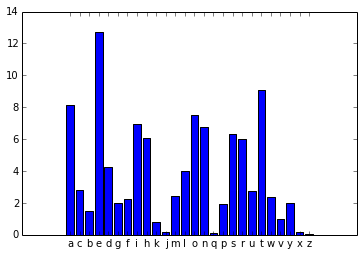

English sample unigram distribution


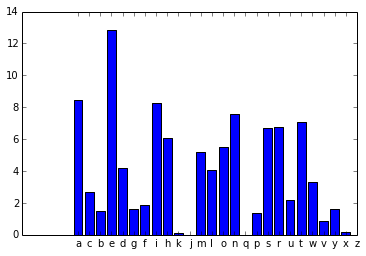

French general unigram distribution


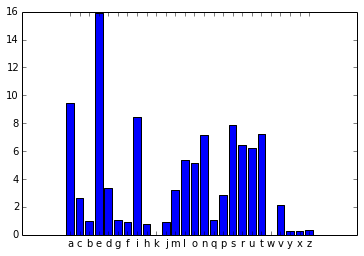

French sample unigram distribution


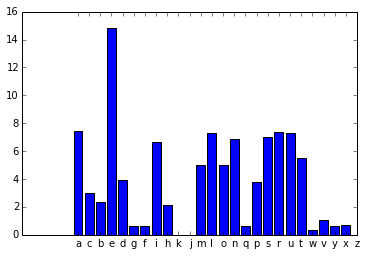

In [3]:
# This function take in input a frequency then return a dictionnary of frequency
def compute_frequency(input_string):
    dictionnary_frequency = {}
    for character in input_string:
        if ord(character) >= 97 and ord(character) <= 122:
            if character in dictionnary_frequency:
                dictionnary_frequency[character] += 1
            else:
                dictionnary_frequency[character] = 1
    number_of_char = sum(dictionnary_frequency.values())
    for letter in dictionnary_frequency:
        dictionnary_frequency[letter] = dictionnary_frequency[letter]/float(number_of_char) * 100
    for letter in FRENCH_FREQUENCIES:
        if letter not in dictionnary_frequency:
            dictionnary_frequency[letter] = 0
    return dictionnary_frequency

plt.bar(range(len(ENGLISH_FREQUENCIES)), ENGLISH_FREQUENCIES.values(), align='center')
plt.xticks(range(len(ENGLISH_FREQUENCIES)), ENGLISH_FREQUENCIES.keys())
print "English general unigram distribution"
plt.show()

english_sample_distribution = compute_frequency(ENGLISH_SAMPLE)
plt.bar(range(len(english_sample_distribution)), english_sample_distribution.values(), align='center')
plt.xticks(range(len(english_sample_distribution)), english_sample_distribution.keys())
print "English sample unigram distribution"
plt.show()

plt.bar(range(len(FRENCH_FREQUENCIES)), FRENCH_FREQUENCIES.values(), align='center')
plt.xticks(range(len(FRENCH_FREQUENCIES)), FRENCH_FREQUENCIES.keys())
print "French general unigram distribution"
plt.show()

french_sample_distribution = compute_frequency(FRENCH_SAMPLE)
plt.bar(range(len(french_sample_distribution)), french_sample_distribution.values(), align='center')
plt.xticks(range(len(french_sample_distribution)), french_sample_distribution.keys())
print "French sample unigram distribution"
plt.show()

Caesar function
--

In [4]:
# This function take a text in input and the shift you want to apply
def caesar(input_string, shift):
    output_string = ''
    input_string = unicodedata.normalize('NFKD', unicode(input_string, 'utf-8')).encode('ASCII', 'ignore')
    input_string = str(input_string).lower()
    for character in input_string:
        if ord(character) >= 97 and ord(character) <= 122:
            ascii_value = ord(character)
            new_ascii_value = ((ascii_value + shift - 97) % 26) + 97
            output_string = output_string + chr(new_ascii_value)
        elif character == '\n':
            output_string = output_string
        else:
            output_string = output_string + character
    return output_string


# This function take a letter distribution and return a language
def get_languages_of_the_text(text_frequencies):
    sorted_text = sorted(text_frequencies.items(), key=operator.itemgetter(1))
    sorted_english = sorted(ENGLISH_FREQUENCIES.items(), key=operator.itemgetter(1))
    sorted_french = sorted(FRENCH_FREQUENCIES.items(), key=operator.itemgetter(1))
    chi_french = 0
    chi_english = 0
    for index, value in enumerate(sorted_text):
        if sorted_text[index][1] != 0: 
            chi_french = chi_french + math.pow(sorted_text[index][1] - sorted_french[index][1], 2)/(sorted_text[index][1] + sorted_french[index][1])
            chi_english = chi_english + math.pow(sorted_text[index][1] - sorted_english[index][1], 2)/(sorted_text[index][1] + sorted_english[index][1])
    print 'Chi French', chi_french, 'Chi English' ,chi_english
    if chi_french > chi_english:
        return 'English'
    else:
        return 'French'

# In input a language and a letter distribution return 3 main probable 
def get_shift(language, text_frequency):
    sorted_text = sorted(text_frequency.items(), key=operator.itemgetter(1))
    if language == 'French':
        sort_language = sorted(FRENCH_FREQUENCIES.items(), key=operator.itemgetter(1))
    else:
        sort_language = sorted(ENGLISH_FREQUENCIES.items(), key=operator.itemgetter(1))
    possible_shift = []
    for index, value in enumerate(sorted_text):
        shift = (ord(sorted_text[index][0]) - ord(sort_language[index][0])) % 26
        possible_shift.append(shift)
    data = Counter(possible_shift)
    return [data.most_common()[0][0], data.most_common()[1][0], data.most_common()[2][0]]

def decrypt(input_text):
    text_frequency = compute_frequency(input_text)
    language = get_languages_of_the_text(text_frequency)
    possible_shifts = get_shift(language, text_frequency)
    return possible_shifts

Caesar encryption
--

In [5]:
encrypted = caesar(ENGLISH_SAMPLE, 1)

Get the 3 mains possible shift
--

In [6]:
decrypt(encrypted)

Chi French 1.86839385978 Chi English 0.699689866719


[1, 2, 8]

Try to decript the encrypted text
--

In [7]:
caesar(encrypted, -1)

"after his debut album infinite (1996), eminem achieved mainstream popularity in 1999 with the slim shady lp, which earned him his first grammy award for best rap album. his next two releases, 2000's the marshall  mathers lp and 2002's the eminem show, were worldwide successes, with each being certified diamond in u.s. sales and both winning best rap album grammy awardsmaking eminem the first artist to win the award for three consecutive lps. they were followed by encore in 2004, another critical and commercial success. eminem went on hiatus after touring in 2005, releasing relapse in 2009 and recovery in 2010. both won grammy awards and recovery was the best-selling album of 2010 worldwide, the second time he had the international best-selling album of the year (after the eminem show). eminem's eighth album, 2013's the marshall mathers lp 2, won two grammy awards, including best rap album; it expanded his record for the most wins in that category and his grammy total to 15. eminem has